## Initiez-vous au Machine Learning

### Entraînez votre premier k-NN

In [10]:
# from sklearn.datasets import fetch_mldata

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

In [20]:
from warnings import filterwarnings
filterwarnings('ignore') 

In [3]:
house = pd.read_csv("house.csv")
house.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [4]:
house[:10]

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
5,970,24
6,1560,41
7,1960,67
8,2000,63
9,2600,70


In [8]:
import numpy as np

sample = np.random.randint(70, size=20)


data = house.iloc[sample]
# target = mnist.house.iloc[sample]

In [9]:
data

,loyer,surface
7,1960,67
55,1600,30
9,2600,70
8,2000,63
63,1795,50
0,1330,37
18,3587,120
8,2000,63
32,1344,31
47,1663,54


In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [12]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [13]:
# Le dataset principal qui contient toutes les images

print (mnist.data.shape)

(70000, 784)


In [14]:
# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)

print (mnist.target.shape)

(70000,)


In [16]:
# Échantillonner pour faciliter le travail

sample = np.random.randint(70000, size=5000)
data = mnist.data.iloc[sample]
target = mnist.target.iloc[sample]

Cette manière de "sampler" le jeu de données est dans l'absolu inexacte. En effet, le tableau d'indices générés par  randint  peut contenir des doublons, ce qui nous conduit à avoir des doublons dans nos données. Comme nous ne prenons que 5000 échantillons sur 70000, le risque est plutôt faible. Pour faire ce travail de manière rigoureuse, regardez la fonction  sklearn.utils.resample.

In [17]:
# Séparez training / testing set

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

Une fois notre dataset chargé, comme nous l'avons vu dans le chapitre précédent, nous allons séparer le jeu de données en training set et testing set.

J'ai ici appelé les images d'exemple "X" et les annotations cibles "y" :

Je le rappelle, on va utiliser uniquement le training set pour entraîner notre modèle et on garde le testing set pour plus tard. J'ai mis la répartition classique 80/20 entre training et testing set.

On peut créer un premier classifieur 3-NN, c'est-à-dire qui prend en compte les 3 plus proches voisins pour la classification. Pour cela, on va utiliser l'implémentation de l'algorithme qui existe dans la librairie scikit-learn :

In [18]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

Comme je l'ai dit plus haut pour le k-NN, l'algorithme ici n'effectue aucune optimisation mais va juste sauvegarder toutes les données en mémoire. C'est sa manière d'apprendre en quelque sorte.


Testons à présent l’erreur de notre classifieur. La méthode  score  effectue exactement ça : tester les performances de prédiction d'un classifieur dans lequel on passe un jeu de données annoté — dans notre cas le jeu de données de test. Il renvoie ainsi le pourcentage de prédiction véridique trouvée par le classifieur.

In [21]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.071000


La performance exacte de notre modèle dépend du jeu de sélection. N'hésitez pas à lancer plusieurs fois ce traitement en changeant les jeux de données d'apprentissage et de test pour vous en rendre compte.


Comme je l'ai dit, le k (nombre de voisins) est l'hyper-paramètre que l’on va chercher à optimiser pour minimiser l’erreur sur les données test.

### Optimisation du score sur les données test

Pour trouver le k optimal, on va simplement tester le modèle pour tous les k de 2 à 15, mesurer l’erreur test et afficher la performance en fonction de k :

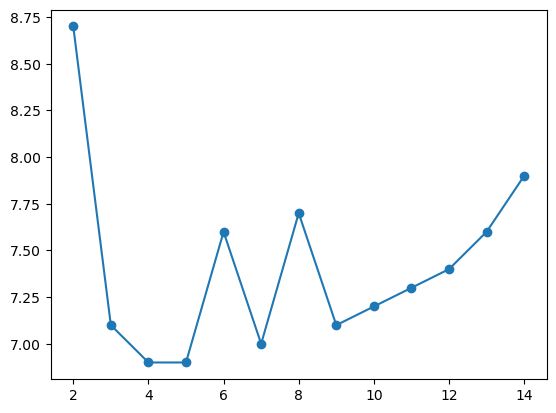

In [22]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

Comme on peut le voir, le k-NN le plus performant est celui pour lequel k = 4. On connaît donc notre classifieur final optimal : 4-nn. Ce qui veut dire que c'est celui qui classifie le mieux les données, et qui donc dans ce cas précis reconnaît au mieux les nombres écrits à la main.

À titre d'exemple, vous pouvez afficher les prédictions du classifieur sur quelques données.

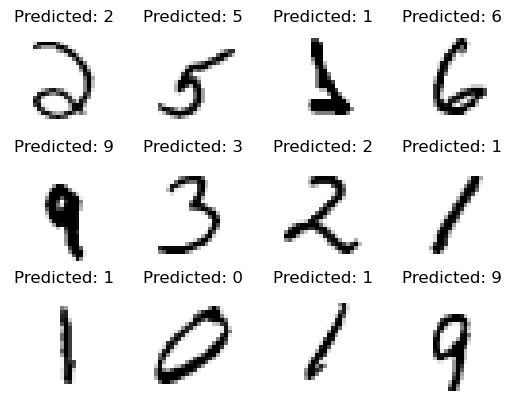

In [23]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.values.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

Les prédictions du classifieur associées aux images

Pour pouvoir un peu mieux comprendre les erreurs effectuées par le classifieur, on peut aussi afficher un extrait des prédictions erronées :

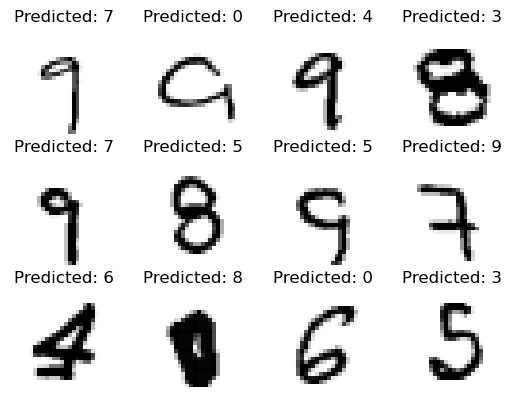

In [24]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()

Quelques exemples d'images mal classées